In [1]:
import torch, pdb
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
def show(tensor, ch=1, size=(28,28), num=16):
  data=tensor.detach().cpu().view(-1,ch,*size) # 128 x 1 x 28 x 28
  grid = make_grid(data[:num], nrow=4).permute(1,2,0)   # 1 x 28 x 28  = 28 x 28 x 1
  plt.imshow(grid)
  plt.show()

In [3]:
epochs = 500
cur_step = 0
info_step = 300
mean_gen_loss = 0
mean_disc_loss = 0

z_dim = 64
lr = 0.00001
loss_func = nn.BCEWithLogitsLoss()

bs = 128
device = 'cuda'

dataloader = DataLoader(MNIST('.', download=True, transform=transforms.ToTensor()),shuffle=True, batch_size=bs)

In [4]:
# Generator
def genBlock(inp, out):
  return nn.Sequential(
      nn.Linear(inp, out),
      nn.BatchNorm1d(out),
      nn.ReLU(inplace=True)
  )

class Generator(nn.Module):
  def __init__(self, z_dim=64, i_dim=784, h_dim=128):
    super().__init__()
    self.gen = nn.Sequential(
        genBlock(z_dim, h_dim), # 64, 128
        genBlock(h_dim, h_dim*2), # 128, 256
        genBlock(h_dim*2, h_dim*4), # 256 x 512
        genBlock(h_dim*4, h_dim*8), # 512, 1024
        nn.Linear(h_dim*8, i_dim), # 1024, 784 (28x28)
        nn.Sigmoid(),
    )

  def forward(self, noise):
       return self.gen(noise)

def gen_noise(number, z_dim):
  return torch.randn(number, z_dim).to(device)

## Discriminator
def discBlock(inp, out):
  return nn.Sequential(
      nn.Linear(inp, out),
      nn.LeakyReLU(0.2)
  )

class Discriminator(nn.Module):
  def __init__(self, i_dim=784, h_dim=256):
    super().__init__()
    self.disc=nn.Sequential(
        discBlock(i_dim, h_dim*4), # 784, 1024
        discBlock(h_dim*4, h_dim*2), # 1024, 512
        discBlock(h_dim*2, h_dim), # 512, 256
        nn.Linear(h_dim, 1) # 256, 1
    )

  def forward(self, image):
      return self.disc(image)

In [5]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

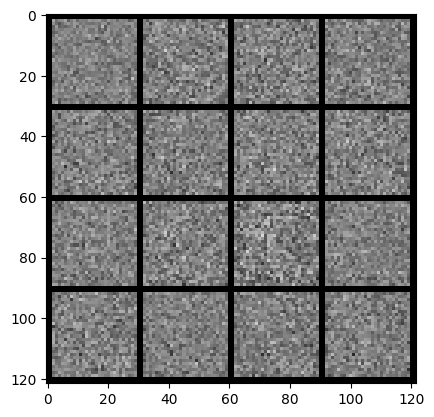

In [6]:
noise = gen_noise(bs, z_dim)
fake = gen(noise)
show(fake)

In [7]:
def calc_gen_loss(loss_func, gen, disc, number, z_dim):
   noise = gen_noise(number, z_dim)
   fake = gen(noise)
   pred = disc(fake)
   targets=torch.ones_like(pred)
   gen_loss=loss_func(pred,targets)

   return gen_loss


def calc_disc_loss(loss_func, gen, disc, number, real, z_dim):
   noise = gen_noise(number, z_dim)
   fake = gen(noise)
   disc_fake = disc(fake.detach())
   disc_fake_targets=torch.zeros_like(disc_fake)
   disc_fake_loss=loss_func(disc_fake, disc_fake_targets)

   disc_real = disc(real)
   disc_real_targets=torch.ones_like(disc_real)
   disc_real_loss=loss_func(disc_real, disc_real_targets)

   disc_loss=(disc_fake_loss+disc_real_loss)/2

   return disc_loss

  0%|          | 0/469 [00:00<?, ?it/s]

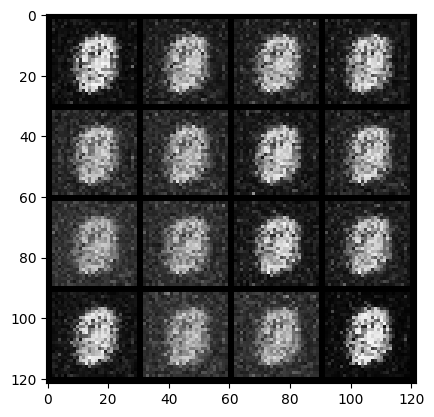

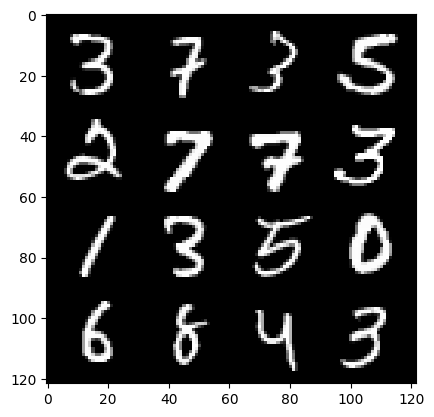

0: step 300 / Gen loss: 1.879638637105624 / disc_loss: 0.3446422880142928


  0%|          | 0/469 [00:00<?, ?it/s]

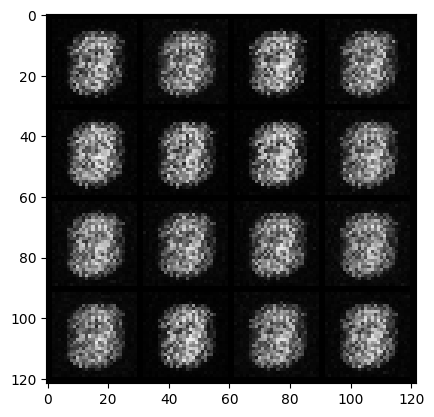

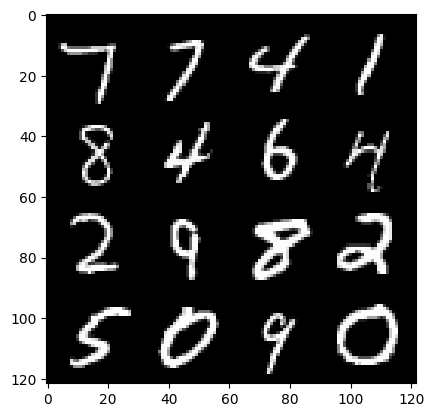

1: step 600 / Gen loss: 3.345704317092897 / disc_loss: 0.12599142111837866


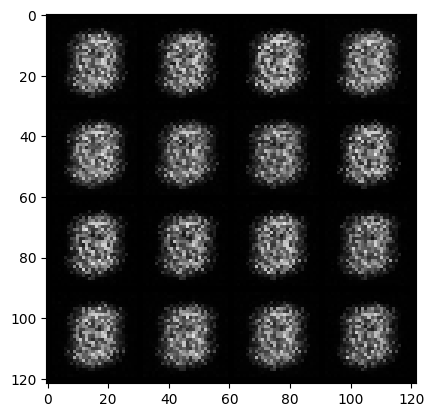

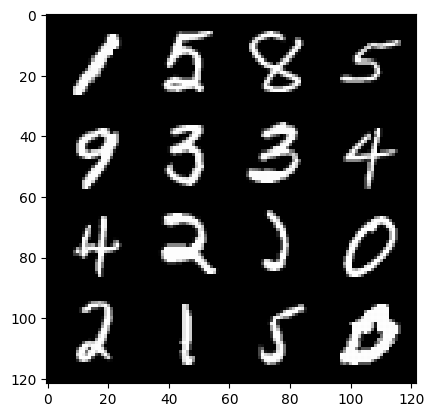

1: step 900 / Gen loss: 3.3513165998458843 / disc_loss: 0.06167212805400293


  0%|          | 0/469 [00:00<?, ?it/s]

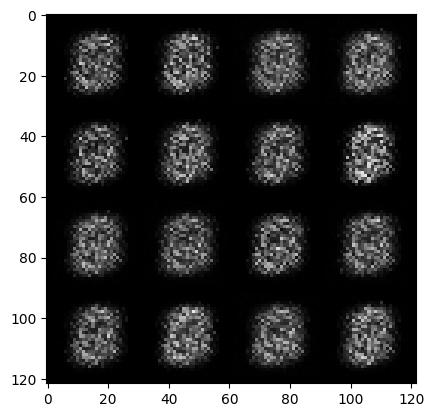

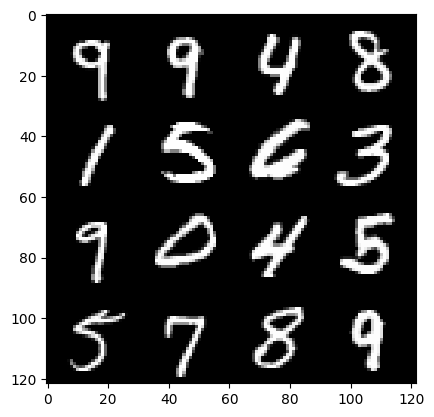

2: step 1200 / Gen loss: 3.435690933068597 / disc_loss: 0.03972450532019138


  0%|          | 0/469 [00:00<?, ?it/s]

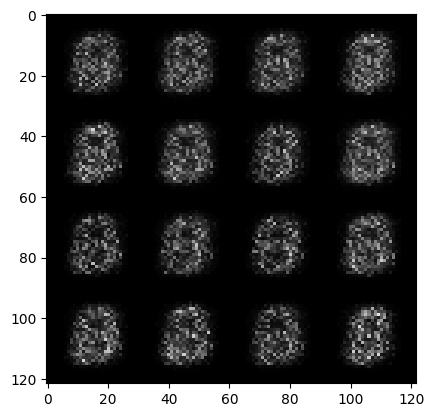

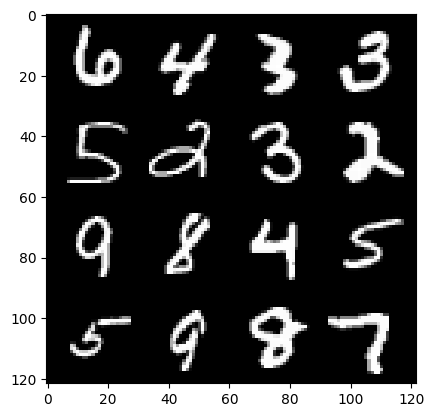

3: step 1500 / Gen loss: 3.3386835662523895 / disc_loss: 0.04344222672283652


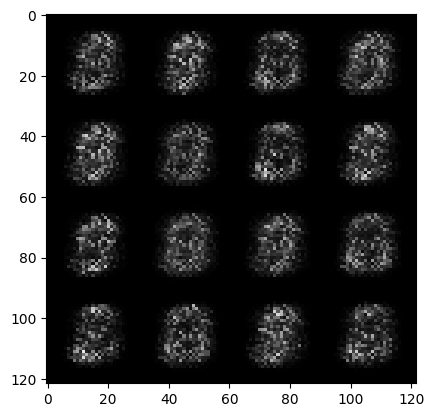

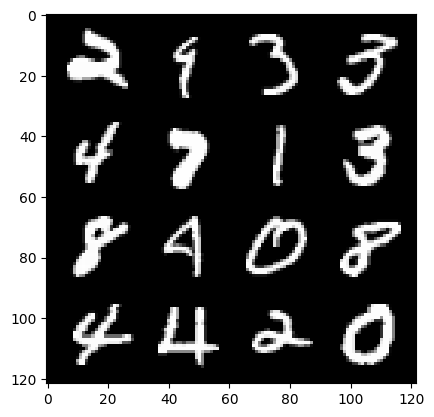

3: step 1800 / Gen loss: 3.353046387036639 / disc_loss: 0.05168519796182714


  0%|          | 0/469 [00:00<?, ?it/s]

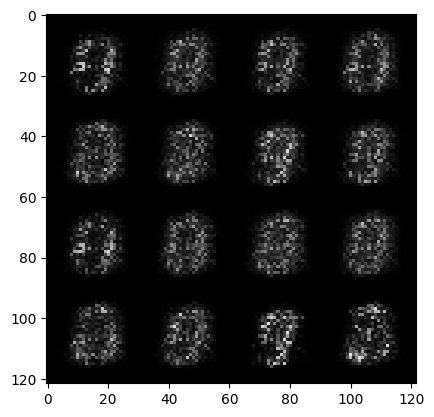

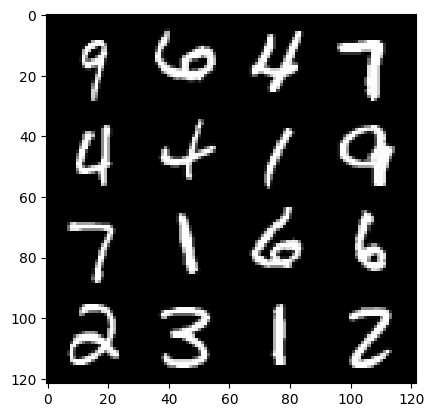

4: step 2100 / Gen loss: 3.5451243472099274 / disc_loss: 0.05207897208631038


  0%|          | 0/469 [00:00<?, ?it/s]

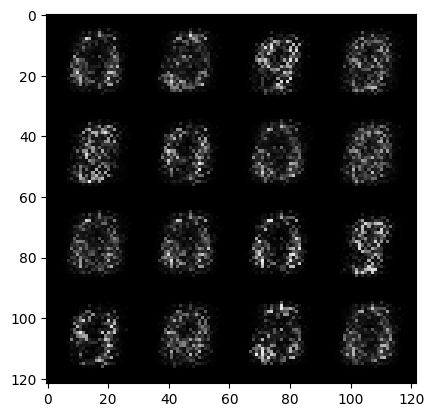

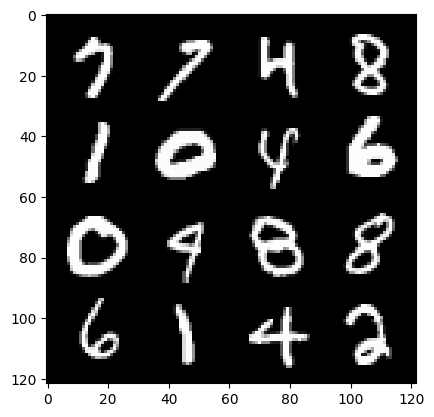

5: step 2400 / Gen loss: 3.816555807590484 / disc_loss: 0.039558731640378646


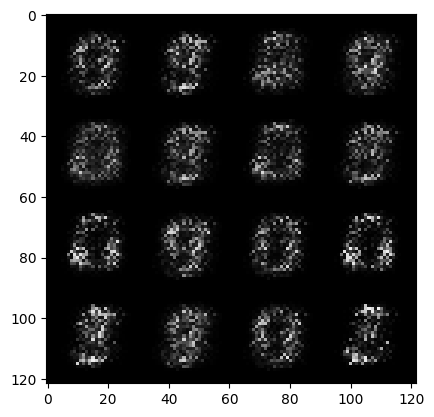

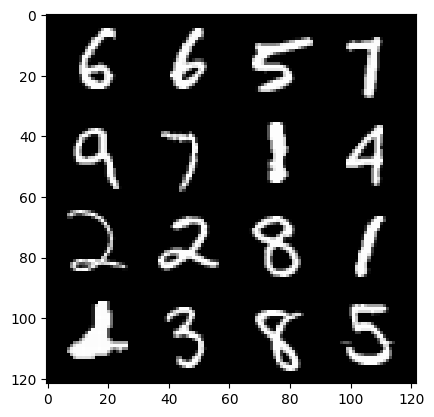

5: step 2700 / Gen loss: 4.328677720228829 / disc_loss: 0.02848682422501344


  0%|          | 0/469 [00:00<?, ?it/s]

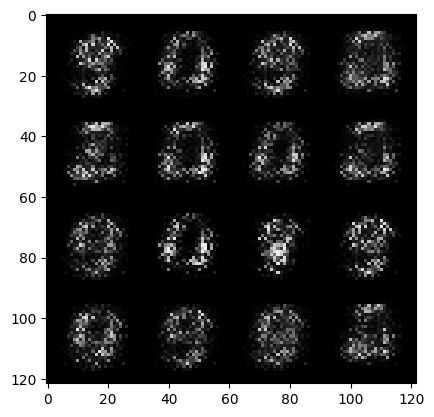

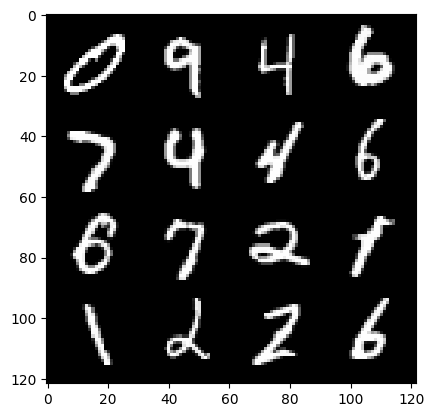

6: step 3000 / Gen loss: 4.756226495107014 / disc_loss: 0.02400945945022005


  0%|          | 0/469 [00:00<?, ?it/s]

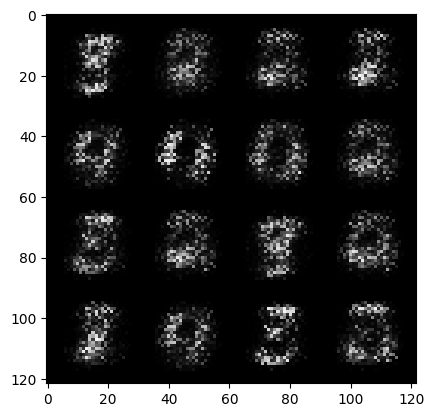

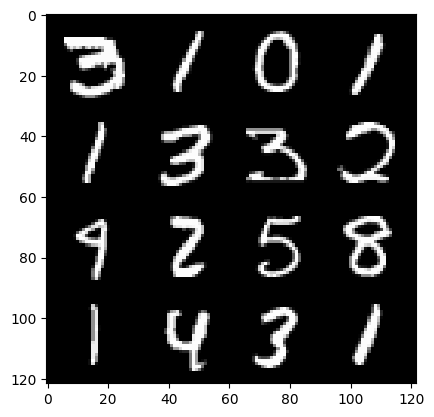

7: step 3300 / Gen loss: 5.017342305183407 / disc_loss: 0.026603179366017367


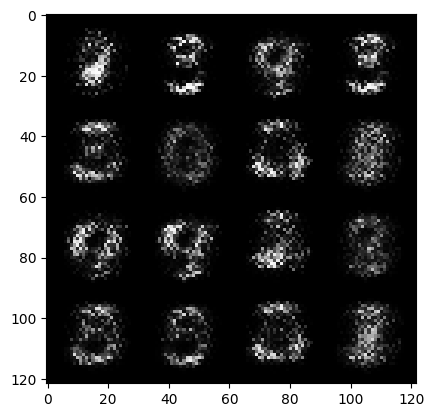

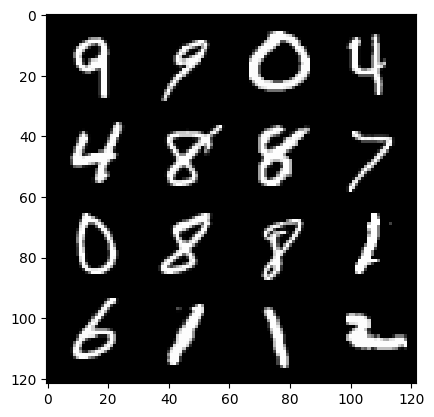

7: step 3600 / Gen loss: 5.342649122873939 / disc_loss: 0.02469084760795035


  0%|          | 0/469 [00:00<?, ?it/s]

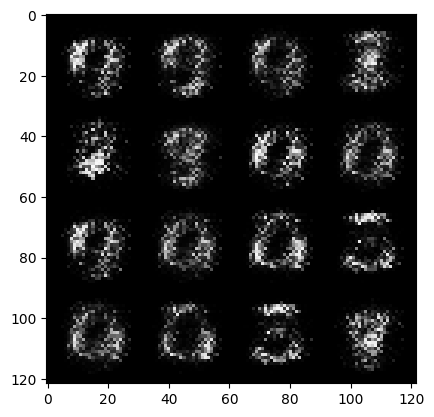

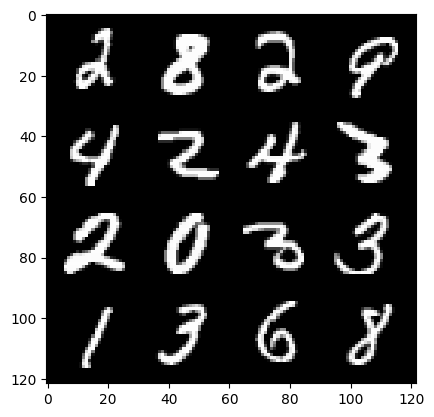

8: step 3900 / Gen loss: 5.1585428905487065 / disc_loss: 0.02435991998141012


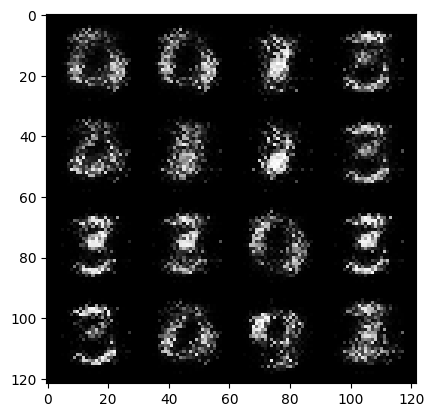

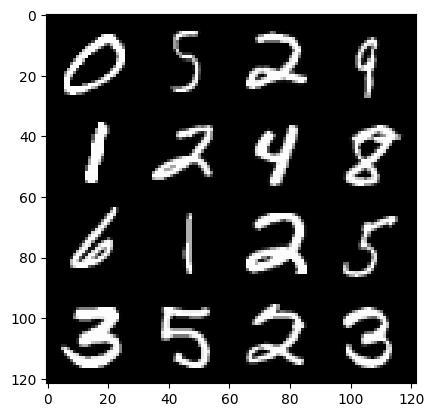

8: step 4200 / Gen loss: 5.5363033850987735 / disc_loss: 0.019682006767640522


  0%|          | 0/469 [00:00<?, ?it/s]

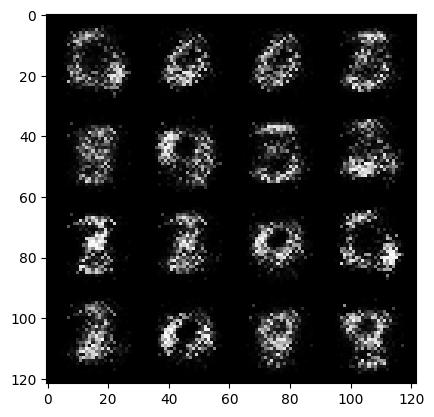

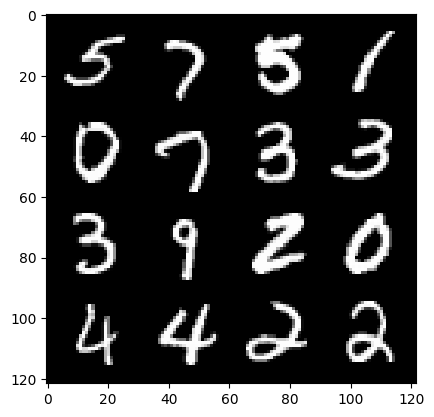

9: step 4500 / Gen loss: 5.828994830449423 / disc_loss: 0.01843068974713484


  0%|          | 0/469 [00:00<?, ?it/s]

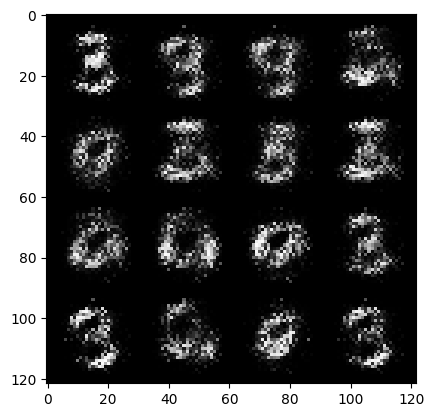

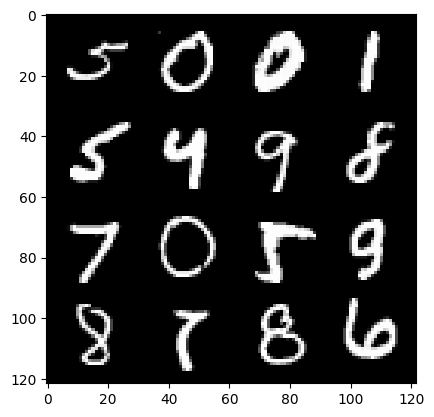

10: step 4800 / Gen loss: 5.867597920099893 / disc_loss: 0.018868416165933037


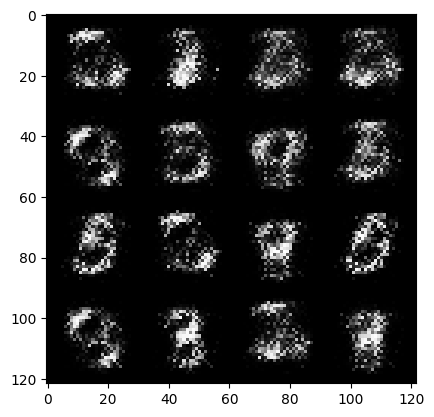

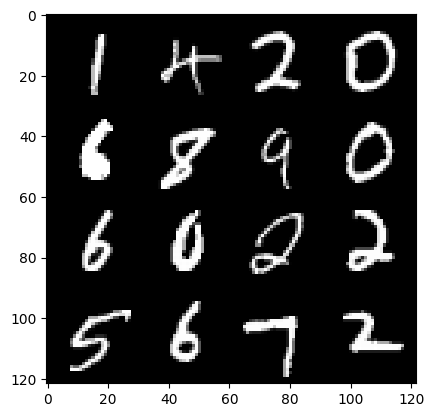

10: step 5100 / Gen loss: 5.934443252881367 / disc_loss: 0.01718784451484681


  0%|          | 0/469 [00:00<?, ?it/s]

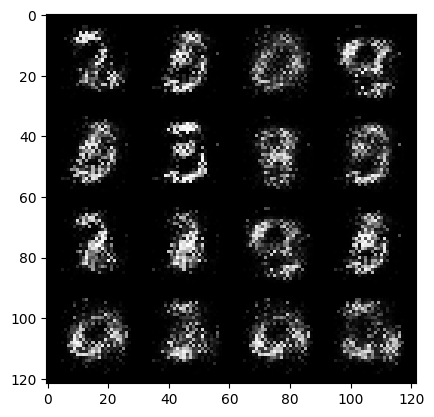

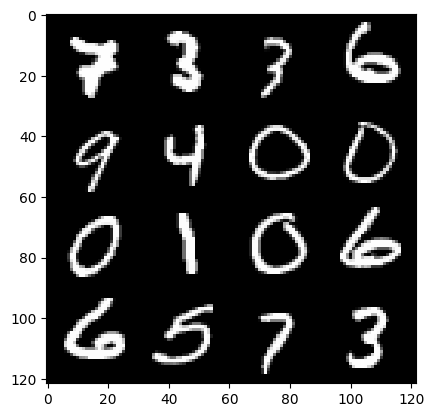

11: step 5400 / Gen loss: 5.99378432750702 / disc_loss: 0.016515475924437258


  0%|          | 0/469 [00:00<?, ?it/s]

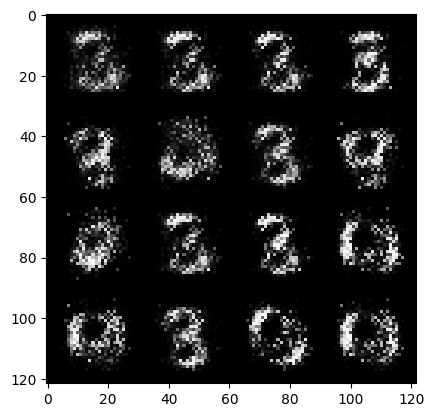

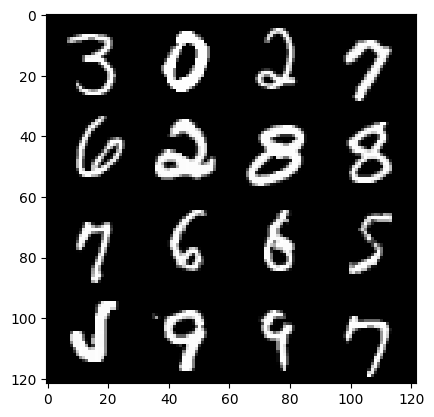

12: step 5700 / Gen loss: 6.169694212277733 / disc_loss: 0.01287586777393396


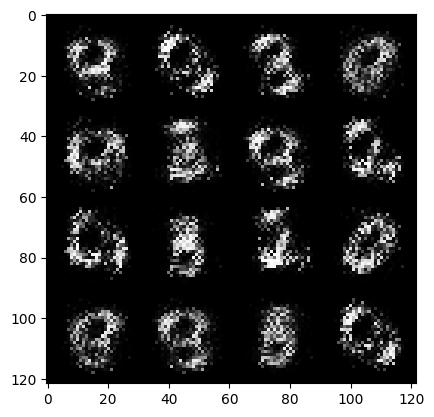

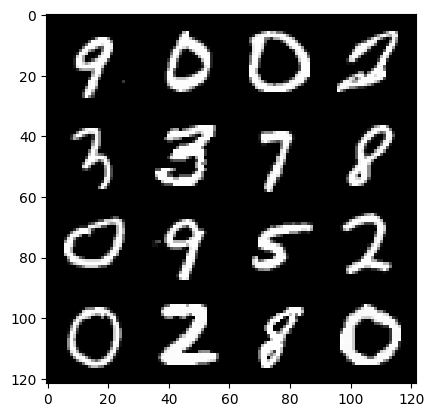

12: step 6000 / Gen loss: 6.6445014031728125 / disc_loss: 0.010948648018141589


  0%|          | 0/469 [00:00<?, ?it/s]

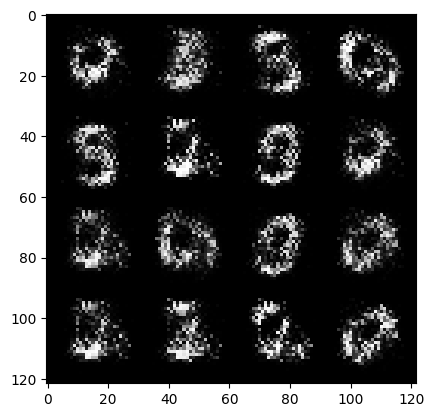

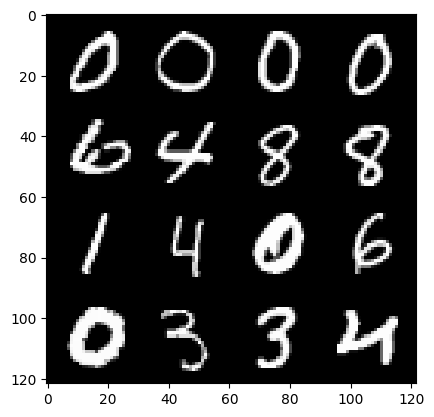

13: step 6300 / Gen loss: 6.672705828348792 / disc_loss: 0.011568199435714625


  0%|          | 0/469 [00:00<?, ?it/s]

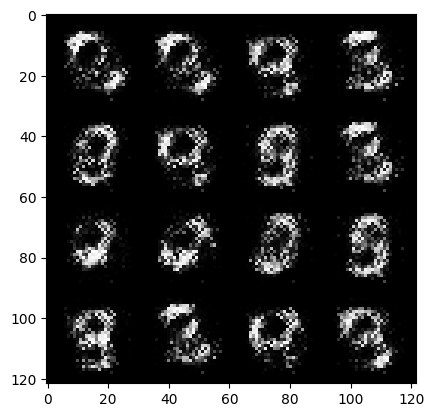

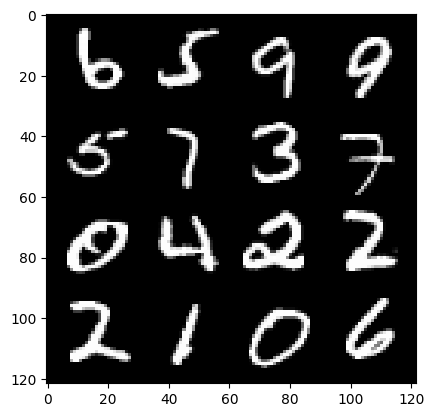

14: step 6600 / Gen loss: 6.7367963949839265 / disc_loss: 0.011094362424531332


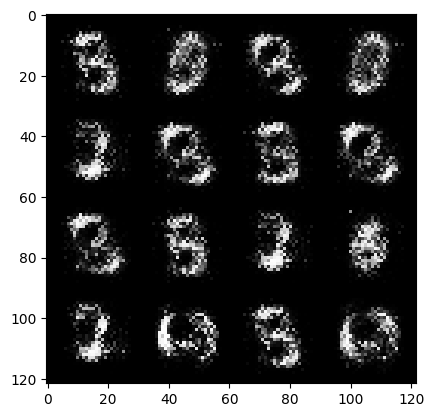

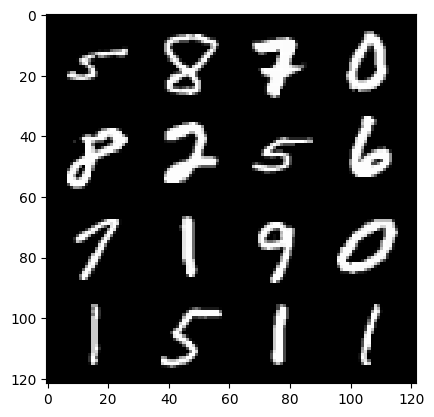

14: step 6900 / Gen loss: 6.8025283241272 / disc_loss: 0.012053205852086343


  0%|          | 0/469 [00:00<?, ?it/s]

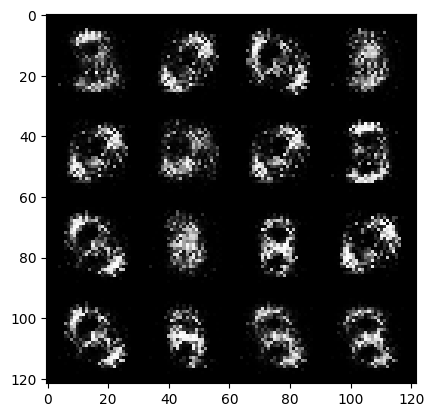

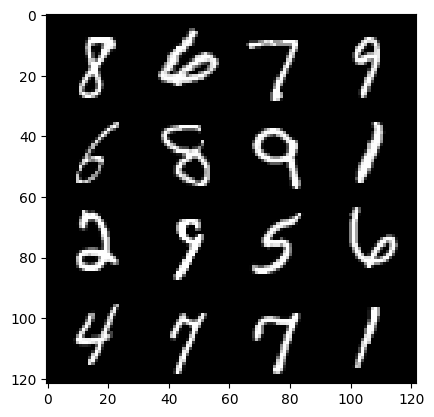

15: step 7200 / Gen loss: 6.916507838567098 / disc_loss: 0.013709936107043175


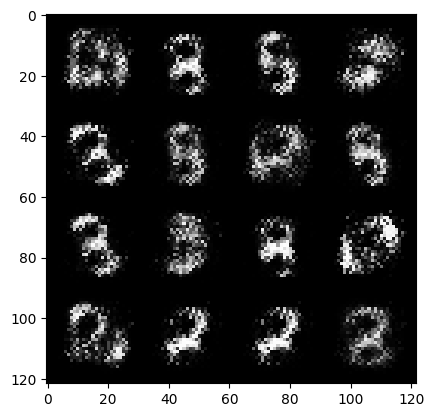

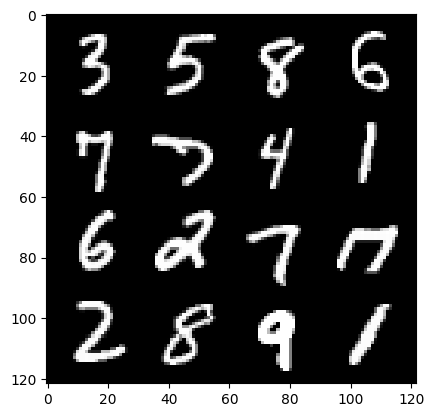

15: step 7500 / Gen loss: 7.106511650085453 / disc_loss: 0.01344998753241574


  0%|          | 0/469 [00:00<?, ?it/s]

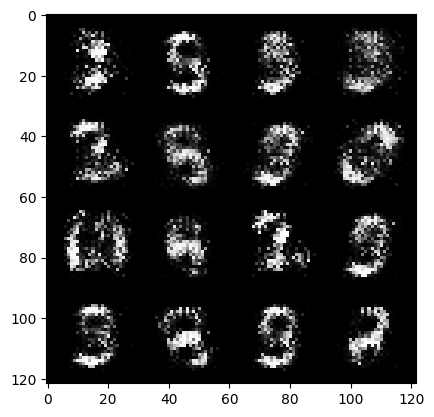

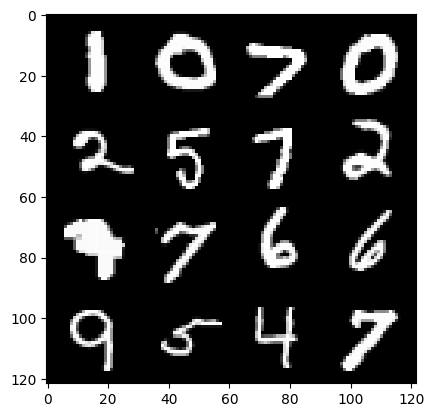

16: step 7800 / Gen loss: 7.093320476214093 / disc_loss: 0.015741335471781588


  0%|          | 0/469 [00:00<?, ?it/s]

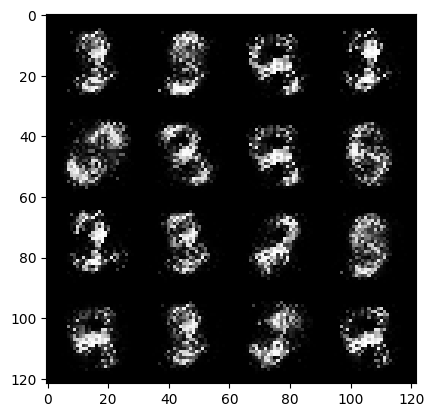

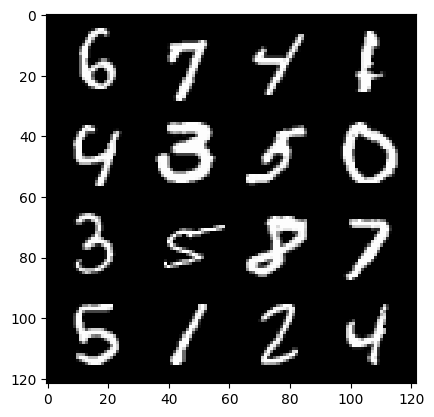

17: step 8100 / Gen loss: 6.648080902099613 / disc_loss: 0.014192050890220959


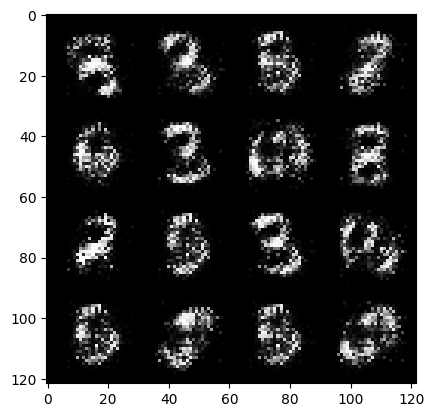

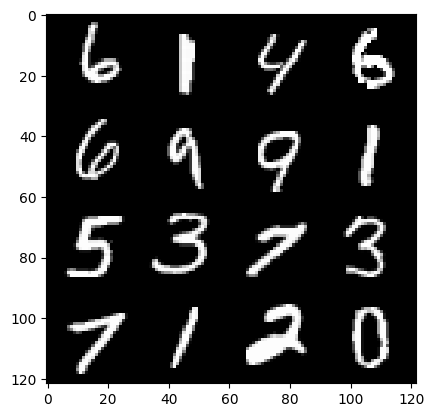

17: step 8400 / Gen loss: 7.064698225657145 / disc_loss: 0.011794354682788253


  0%|          | 0/469 [00:00<?, ?it/s]

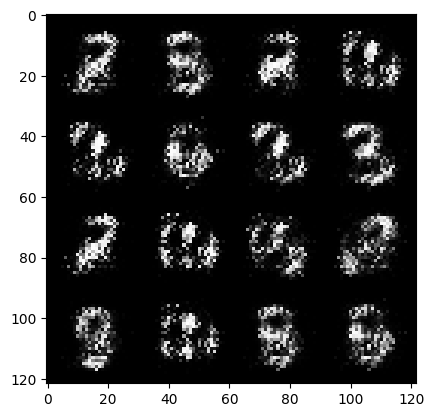

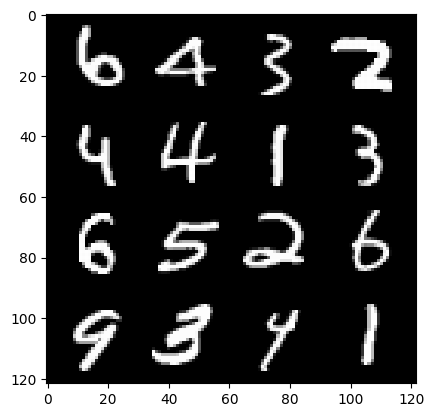

18: step 8700 / Gen loss: 7.164911670684815 / disc_loss: 0.011120530784440542


  0%|          | 0/469 [00:00<?, ?it/s]

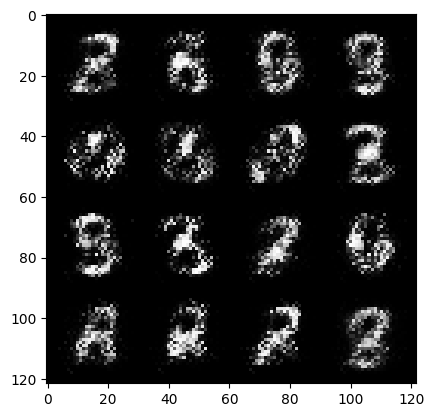

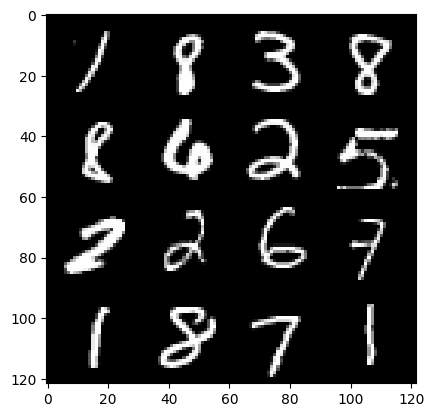

19: step 9000 / Gen loss: 7.012111430168148 / disc_loss: 0.010662438595512259


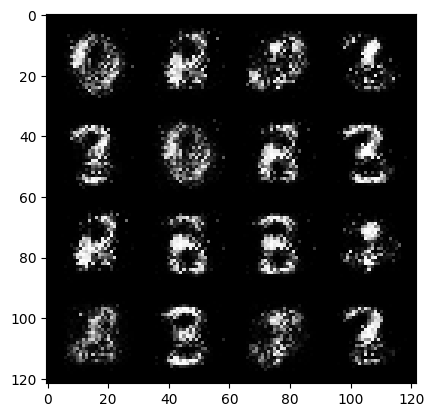

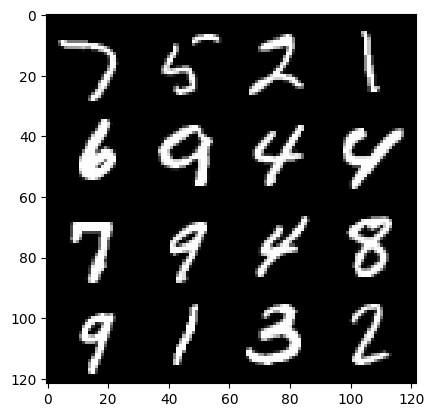

19: step 9300 / Gen loss: 6.6619110679626425 / disc_loss: 0.012001240532069149


  0%|          | 0/469 [00:00<?, ?it/s]

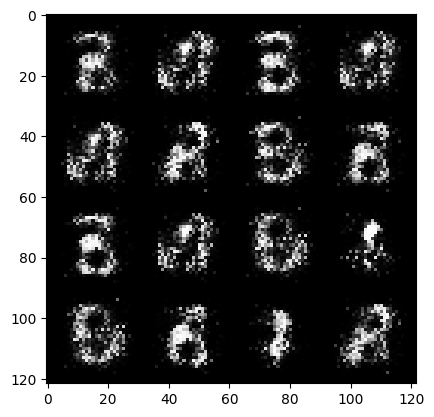

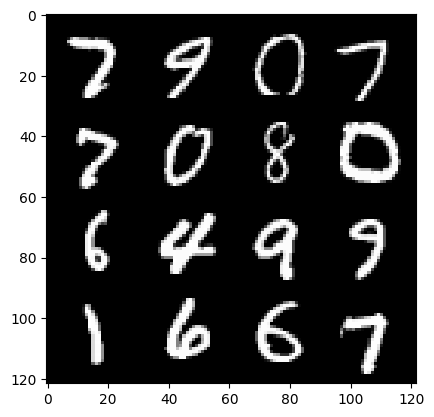

20: step 9600 / Gen loss: 6.899061667124428 / disc_loss: 0.012282715879070259


  0%|          | 0/469 [00:00<?, ?it/s]

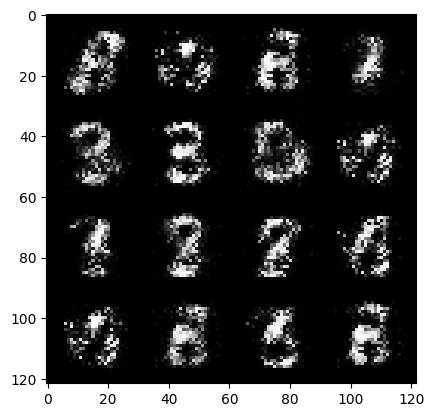

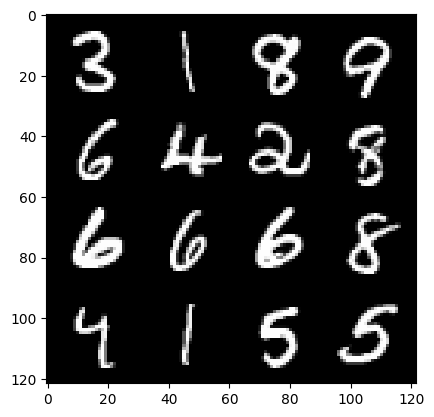

21: step 9900 / Gen loss: 7.019820548693344 / disc_loss: 0.014507933265219125


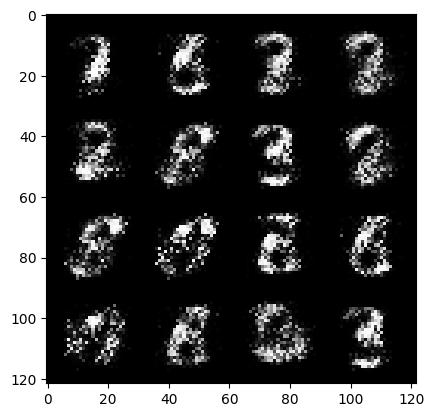

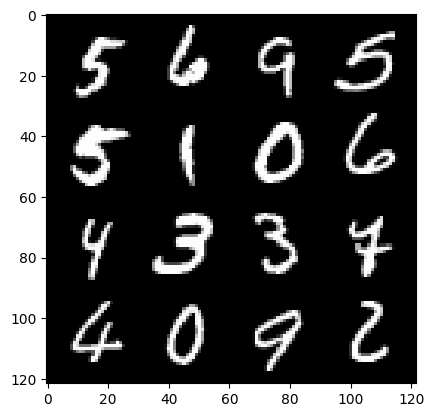

21: step 10200 / Gen loss: 6.928807791074111 / disc_loss: 0.011986281636636708


  0%|          | 0/469 [00:00<?, ?it/s]

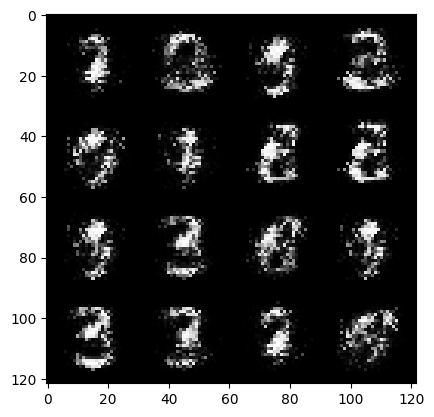

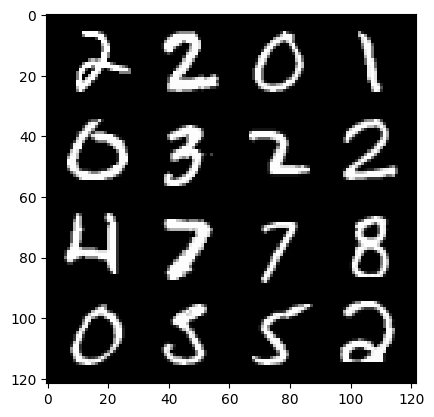

22: step 10500 / Gen loss: 6.661683689753219 / disc_loss: 0.012282903845577195


  0%|          | 0/469 [00:00<?, ?it/s]

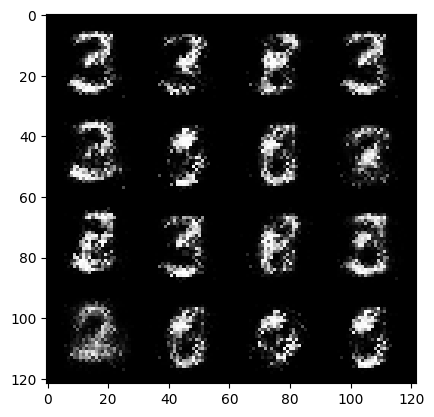

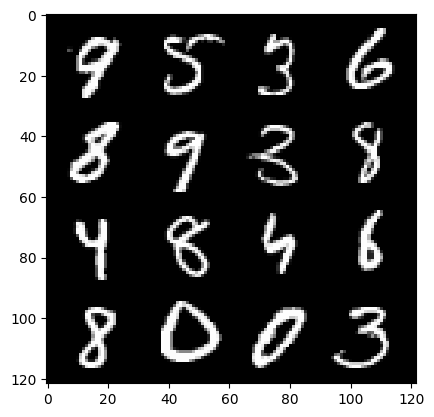

23: step 10800 / Gen loss: 7.171219964027408 / disc_loss: 0.011482568058806153


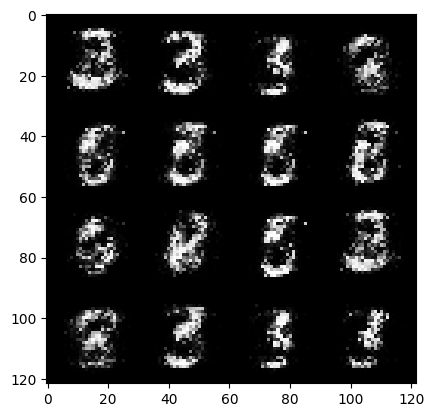

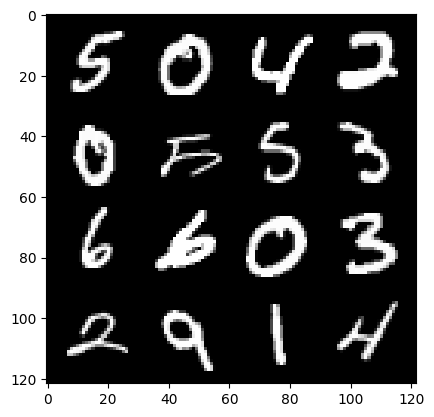

23: step 11100 / Gen loss: 7.268095189730324 / disc_loss: 0.013067761951436588


KeyboardInterrupt: 

In [8]:
for epoch in range(epochs):
  for real, _ in tqdm(dataloader):
    disc_opt.zero_grad()

    cur_bs=len(real) 
    real = real.view(cur_bs, -1) 
    real = real.to(device)

    disc_loss = calc_disc_loss(loss_func,gen,disc,cur_bs,real,z_dim)
    disc_loss.backward(retain_graph=True)
    disc_opt.step()

    gen_opt.zero_grad()
    gen_loss = calc_gen_loss(loss_func,gen,disc,cur_bs,z_dim)
    gen_loss.backward(retain_graph=True)
    gen_opt.step()

    mean_disc_loss+=disc_loss.item()/info_step
    mean_gen_loss+=gen_loss.item()/info_step

    if cur_step % info_step == 0 and cur_step>0:
      fake_noise = gen_noise(cur_bs, z_dim)
      fake = gen(fake_noise)
      show(fake)
      show(real)
      print(f"{epoch}: step {cur_step} / Gen loss: {mean_gen_loss} / disc_loss: {mean_disc_loss}")
      mean_gen_loss, mean_disc_loss=0,0
    cur_step+=1
